# Visualize k-line experiment

Necessary imports:

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
def get_data(i=2):
    # i determines which configuration of the dataset adult2 or adult5
    exp_list = []
    # path to results
    my_path= "../results/k_line_experiment/"
    files = [f for f in os.listdir(my_path) if '{}_results'.format(i) in f]
    # collect all result files regarding this experiment into one list
    for file in files:
        experiment = pd.read_csv(my_path+file)
        experiment = experiment.fillna(0)
        exp_list.append(experiment)
    # concat lists to one dataframe
    experiment = pd.concat(exp_list, ignore_index=True)
    experiment = experiment.drop(columns=['Unnamed: 0'])
    # Rename Algorithms for displaying purposes
    experiment = experiment[experiment['Algorithm']!='GroundTruth']
    experiment = experiment[experiment['Algorithm']!='GroundTruth_DB']
    experiment = experiment.replace('FairSC_normalized', 'FairSC (N)')
    experiment = experiment.replace('Fairlet_Vanilla Fairlet', 'Fairlet')
    experiment = experiment[experiment['Algorithm']!='Fairlet']
    experiment = experiment.replace('Fairlet_MCF Fairlet', 'Fairlet (MCF)')
    experiment = experiment.sort_values(by=['Algorithm'])
    # replace failed evaluation in case of edge cases with 0
    experiment = experiment.replace(-1, 0)
    return experiment

In [64]:
def plot_all(experiment, experiment2):
    # Plot 4 line plots (for each dataset one regarding balance and DCSI)
    colors = ['#FF1F5B','#ffc61e','#009ade','#f28522','#af58ba']
    experiment = experiment.replace('FairDEN', 'FairDen')
    experiment2 = experiment2.replace('FairDEN', 'FairDen')
    limit = 0.35
    fig, axes = plt.subplots(2,2, figsize=(25,10))
    ax1= axes[0,0]
    ax2= axes[0,1]
    ax3= axes[1,0]
    ax4= axes[1,1]
    palette = sns.color_palette(colors)
    #p = sns.lineplot(data=balance_stuff)
    p = sns.lineplot(data=experiment, x="N_cluster", y="Balance", hue="Algorithm",style="Algorithm",palette=palette, lw=5, ax=ax1, dashes= True)
    ax1.set_title("Adult (race)")
    ax1.set_ylim(0, 1)
    p.set(xlabel='k')
    
    p2 = sns.lineplot(data=experiment2, x="N_cluster", y="Balance", hue="Algorithm",style="Algorithm",palette=palette, lw=5, ax=ax2, dashes= True)
    ax2.set_title("Adult (gender)")
    ax2.set_ylim(0, 1)
    p2.set(xlabel='k')
    
    sns.set_style("whitegrid")
    ax1.get_legend().remove()
    ax2.get_legend().remove()

    p3 = sns.lineplot(data=experiment, x="N_cluster", y="DCSI", hue="Algorithm",style="Algorithm",palette=palette, lw=5, ax=ax3, dashes= True)
    ax3.set_title("Adult (race)")
    ax3.set_ylim(-0.01, limit)
    p3.set(xlabel='k')
    p4 = sns.lineplot(data=experiment2, x="N_cluster", y="DCSI", hue="Algorithm",style="Algorithm",palette=palette, lw=5, ax=ax4, dashes= True)
    ax4.set_title("Adult (gender)")
    ax4.set_ylim(-0.01, limit)
    p4.set(xlabel='k')
    
    ax3.get_legend().remove()
    ax4.get_legend().remove()
    plt.tight_layout()
    
    #plt.savefig('Plots/Lineplot_adult_both.svg')

/var/folders/nc/bk5y8hg15dj22klbh0nsdc400000gn/T/ipykernel_13545/3400473843.py:16: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  p = sns.lineplot(data=experiment, x="N_cluster", y="Balance", hue="Algorithm",style="Algorithm",palette=palette, lw=5, ax=ax1, dashes= True)
/var/folders/nc/bk5y8hg15dj22klbh0nsdc400000gn/T/ipykernel_13545/3400473843.py:31: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  p3 = sns.lineplot(data=experiment, x="N_cluster", y="DCSI", hue="Algorithm",style="Algorithm",palette=palette, lw=5, ax=ax3, dashes= True)


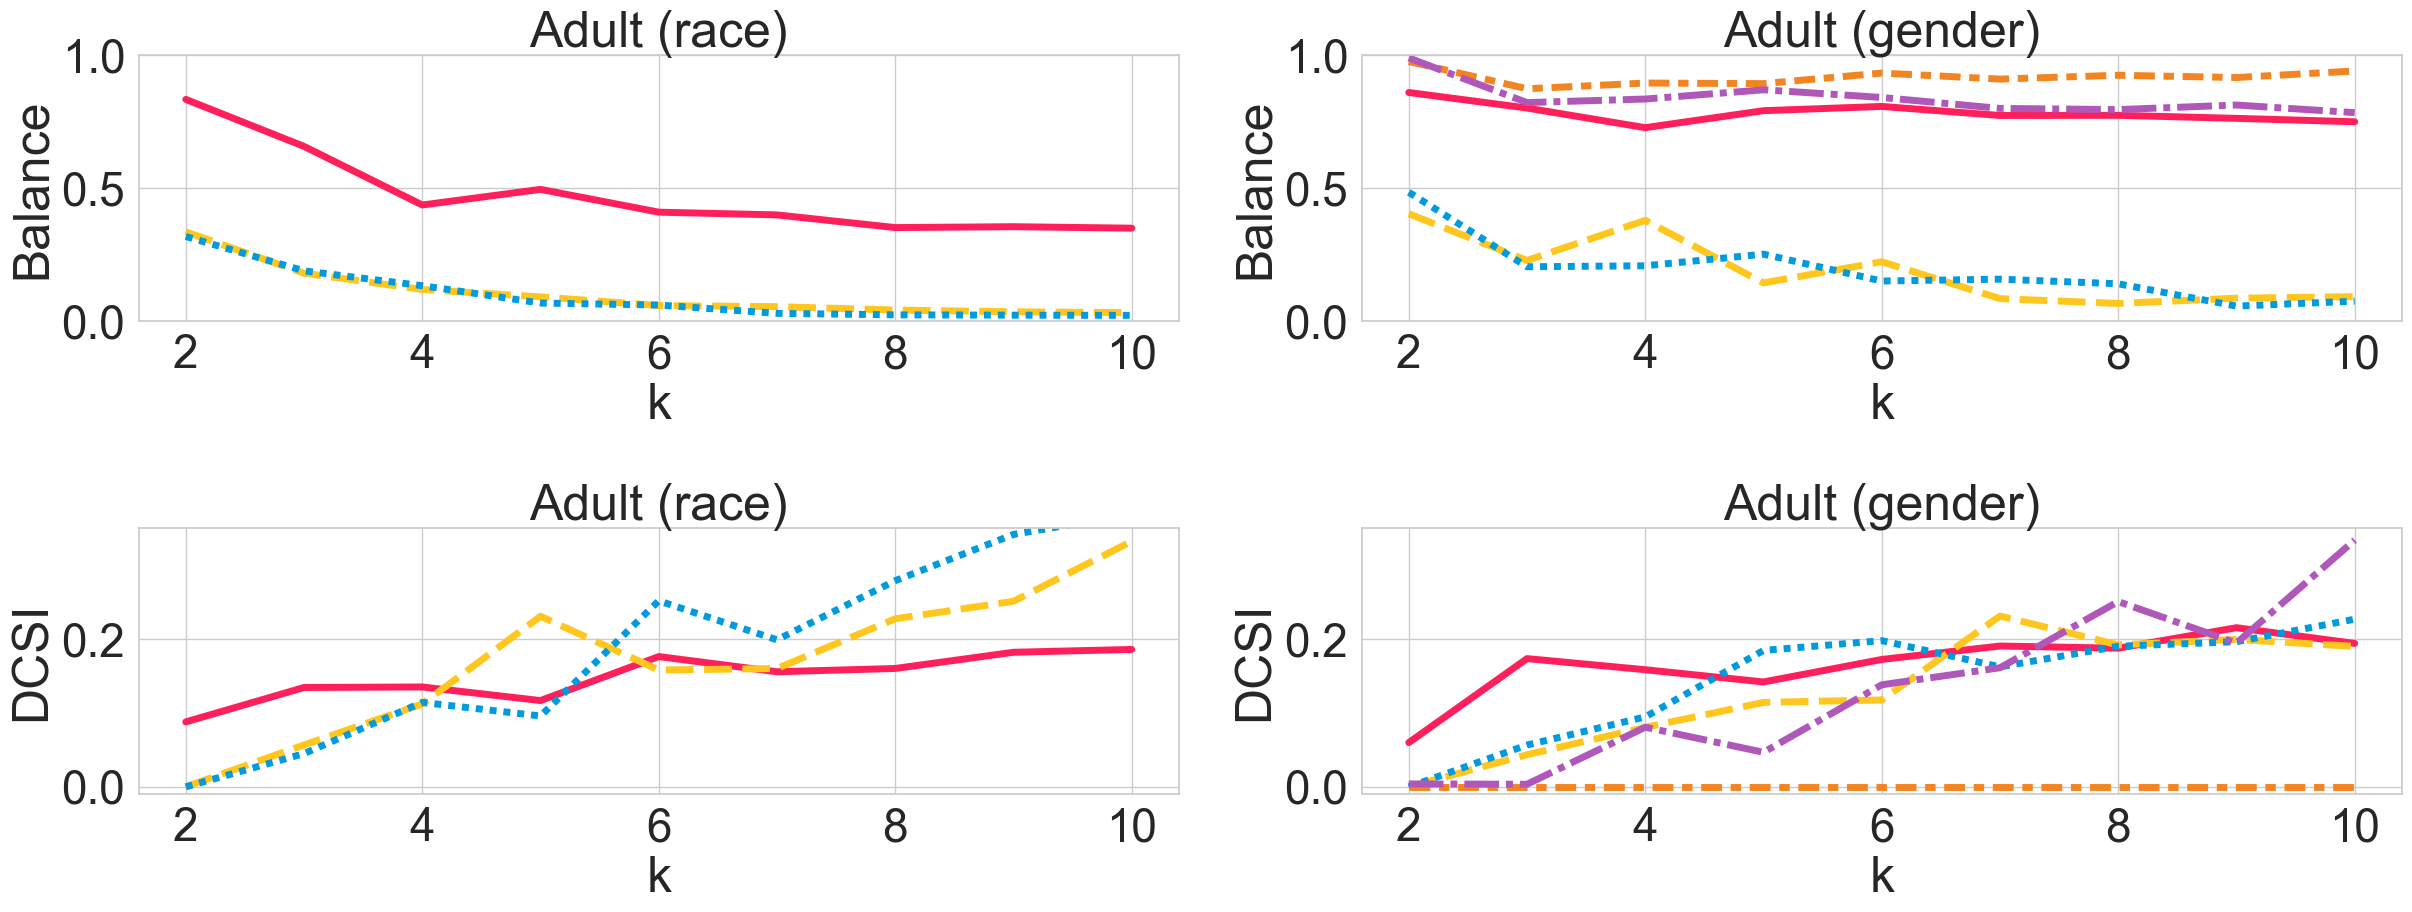

In [59]:
# get both datasets
exp2 = get_data(2)
exp4 = get_data(5)
# plot the data
plot_all(exp2, exp4)